<a href="https://colab.research.google.com/github/Rishabh242002/Electricity_theft_detection/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_final.csv')

In [ ]:
df.drop(['Unnamed: 0'],axis =1,inplace=True)

In [ ]:
data = df[1000:10000]
#data.drop(['Unnamed: 0'],axis =1,inplace=True)
data.to_csv('test_data.csv')

In [ ]:
Y = data['OutPut']
data.drop(['OutPut'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##Full data

In [ ]:
Y = df['OutPut']
df.drop(['OutPut'],axis=1,inplace=True)

In [ ]:
#Count no of 1 in Y
count = 0;
for i in Y:
  if(i==1):
    count = count+1
print(count)


3615


In [ ]:
# Count no of 0 in Y
len(Y)-count

30226

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.12,9.960,16.92,7.600,27.161,18.05,26.47,18.75,17.84,14.920
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.000
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.000
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.50,9.990,11.78,18.590,26.800,18.57,14.59,12.82,19.37,15.920
4,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,17.77,10.370,15.32,13.510,12.230,14.68,16.35,18.14,18.41,17.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33836,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,223.88,184.340,172.69,205.440,207.640,233.38,194.74,183.91,182.19,246.034
33837,1.84,1.82,2.26,1.80,1.24,1.69,1.95,1.20,1.29,1.36,...,0.83,4.830,6.50,6.915,7.330,5.83,7.00,5.48,5.16,8.160
33838,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.97,5.700,6.41,6.880,9.700,8.25,8.91,8.30,7.41,7.800
33839,0.08,0.25,0.08,0.10,0.00,0.00,0.00,0.00,0.05,0.14,...,0.24,0.366,0.16,0.160,0.170,0.19,0.29,0.23,0.20,0.260


In [ ]:
abn_x = df.iloc[4]
nor_x = df.iloc[33837]

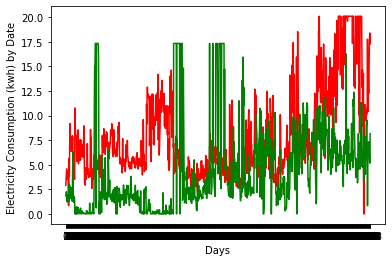

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(abn_x,'r-')
plt.plot(nor_x,'g-')
plt.xlabel('Days')
plt.ylabel('Electricity Consumption (kwh) by Date ')
plt.show()

In [ ]:
x = np.array(df)
y = np.array(Y)

In [ ]:
print(x.shape)
print(y.shape)

(33841, 1034)
(33841,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30456, 1034)
(30456,)
(3385, 1034)
(3385,)


In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC() #C = 100, degree = 10, kernel = 'rbf',
clf.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3009
           1       0.73      0.05      0.09       376

    accuracy                           0.89      3385
   macro avg       0.81      0.52      0.52      3385
weighted avg       0.88      0.89      0.85      3385



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.892466765140325

#save model

In [ ]:
from joblib import dump, load
dump(clf, 'SVM.joblib')

['SVM.joblib']

In [ ]:
!cp 'final_SVM.joblib' '/content/drive/MyDrive/final_SVM.joblib'

cp: cannot stat 'final_SVM.joblib': No such file or directory


In [ ]:
#Normalised False give no of correctly clasify sample
#Normalised True give percentage accuracy
count = accuracy_score(y_test, y_pred, normalize=False)

In [ ]:
print('No of correctly classify sample ',count, ' out of ',len(y_test))


No of correctly classify sample  3021  out of  3385


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


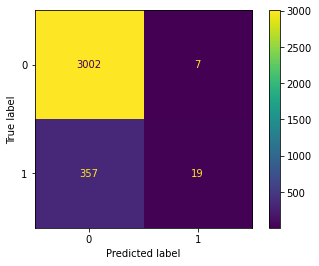

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix SVM@80
[[3002    7]
 [ 357   19]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.99767365 0.00232635]
 [0.94946809 0.05053191]]


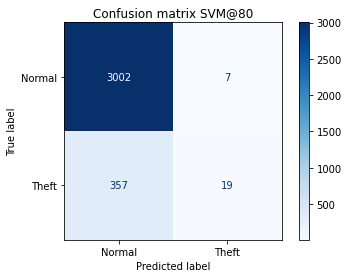

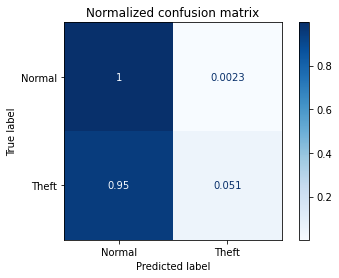

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix SVM@80", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=['Normal','Theft'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
clf = svm.SVC(C = 100, degree = 10, kernel = 'rbf',probability=True)
clf.fit(x_train, y_train)

In [ ]:
probs = clf.predict_proba(x_test)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_pred

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic (ROC) SVM@80')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = # false_positive_rate
y = # true_positive_rate

# This is the ROC curve
plt.plot(x,y)
plt.show()

# This is the AUC
auc = np.trapz(y,x)

#Testing

In [ ]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)



In [ ]:
y_pred = clf.predict(x_test)
y_pred.shape

In [ ]:
import random

In [ ]:
y_test_m = []
x_text_m = []
for i in range(1,3001):
  h = random.randint(1,20000)
  y_test_m.append(y_train[h])
  x_text_m.append(x_train[h])
print(len(y_test_m))
print(len(x_text_m))




In [ ]:
for i in range(1,(6769-2999)):
  h = random.randint(1,6769)
  y_test_m.append(y_test[h])
  x_text_m.append(x_test[h])
print(len(y_test_m))
print(len(x_text_m))

In [ ]:
y_pred_m = clf.predict(x_text_m)
y_pred_m.shape

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_m, y_pred_m))

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test_m, y_pred_m))


In [ ]:
import random
y_test_m = []
x_text_m = []
for i in range(1,3001):
  h = random.randint(1,20000)
  y_test_m.append(y_train[h])
  x_text_m.append(x_train[h])
print(len(y_test_m))
print(len(x_text_m))
for i in range(1,(6769-2999)):
  h = random.randint(1,6769)
  y_test_m.append(y_test[h])
  x_text_m.append(x_test[h])
print(len(y_test_m))
print(len(x_text_m))
y_pred_m = clf.predict(x_text_m)
y_pred_m.shape
from sklearn.metrics import classification_report
print(classification_report(y_test_m, y_pred_m))
from sklearn.metrics import precision_score
print(precision_score(y_test_m, y_pred_m))